### k-최근접 이웃 회귀
- k-최근접 이웃 분류
    - 예측하려는 샘플에 가장 가까운 이웃을 k개를 선택
    - 이웃들의 클래스를 확인
    - 샘플 주변의 다수의 클래스를 샘플의 클래스로 예측
- k-최근접 이웃 회귀
    - 예측하려는 샘플에 가장 가까운 이웃 k개를 선택
    - 이웃의 평균을 구함

##### 데이터 준비
- 농어(perch)의 길이로 무게를 잘 예측할 수 있을까?

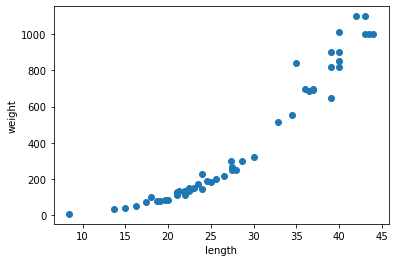

In [1]:
import	numpy as	np
import	matplotlib.pyplot as	plt

perch_length =	np.array([8.4,	13.7,	15.0,	16.2,	17.4,	18.0,	18.7,	19.0,	19.6,	20.0,	
21.0,	21.0,	21.0,	21.3,	22.0,	22.0,	22.0,	22.0,	22.0,	22.5,	
22.5,	22.7,	23.0,	23.5,	24.0,	24.0,	24.6,	25.0,	25.6,	26.5,	
27.3,	27.5,	27.5,	27.5,	28.0,	28.7,	30.0,	32.8,	34.5,	35.0,	
36.5,	36.0,	37.0,	37.0,	39.0,	39.0,	39.0,	40.0,	40.0,	40.0,	
40.0,	42.0,	43.0,	43.0,	43.5,	44.0])
perch_weight =	np.array([5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,	
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,	130.0,
150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,	197.0,	218.0,	
300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,	514.0,	556.0,	840.0,	
685.0,	700.0,	700.0,	690.0,	900.0,	650.0,	820.0,	850.0,	900.0,	1015.0,
820.0,	1100.0,	1000.0,	1100.0,	1000.0,	1000.0])
#	산점도 확인
plt.scatter(perch_length,	perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트와 테스트 세트 준비
§ train_test_split() 함수 사용
• 1개의 데이터 세트(perch_length)만 사용
• scikit-learn의 훈련 세트는 2차원 배열을 사용
– 입력 데이터 세트를 2차원 배열 형태로 변경이 필요
– reshape(row,	col) 함수 사용
– (42,) -> (42, 1)형태로 변경

In [5]:
from sklearn.model_selection import train_test_split

train_input,	test_input,	train_target,	test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(train_input.shape,	test_input.shape)

#	reshape(-1,	1):	-1:	행의 크기를 자동 지정
train_input=train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input=test_input.reshape(-1, 1) # 2차원 배열로 변경\

print(train_input.shape,	test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


#### k-최근접 이웃 회귀 알고리즘 정확도 계산
- k-최근접 이웃 회귀 알고리즘
    - KNeighborsRegressor 클래스 사용
- n_neighbors: 기본 값=5

- score()
    - 결정 계수(R2)를 리턴함
    - 출력하는 값이 높을수록 정확도가 높음

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
# 모델 훈련
knr.fit(train_input, train_target)

#	score():	훈련 모델 점수 확인,	결정 계수(R2)를 리턴
print(knr.score(test_input,	test_target))
# 0.992809406101064 => 결정계수

0.992809406101064


##### 결정 계수(R2)
- 결정 계수 (R2) 값</br>
    • 회귀식이 얼마나 정확한지를 나타내는 숫자 (0 ≤ $R^2$ ≤ 1)</br>
    – 0에 가까울수록, 회귀식의 정확도는 낮음</br>
    – 1에 가까울 수록, 회귀식의 정확도는 높음</br>

- $R^2$ = 1 − $(target − 예측)^2$의 합 / $(target - target평균)^2$의 합
